In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from vlfpy import *
import random

In [2]:
carrier = 21e3
fs = 1e6
T = 1/100


msk_data, t, data, phase = generate_msk(10, 0.5, T, carrier, fs, offset=0, phase_offset=0, amplitude=1)



In [3]:
def add_zeros(data, zero_time, interval_time, fs):
    # Add zero intervals to the data
    # data: data to add zeros to
    # zero_time: length of zeros in seconds
    # interval_time: interval between zeros in seconds
    # fs: sampling frequency

    data_zeros = np.copy(data)

    for i in range(int(len(data)/int(interval_time*fs))):
        T1 = i*int(interval_time*fs)
        T2 = T1 + int(zero_time*fs)
        data_zeros[T1:T2] = 0

    return data_zeros
    

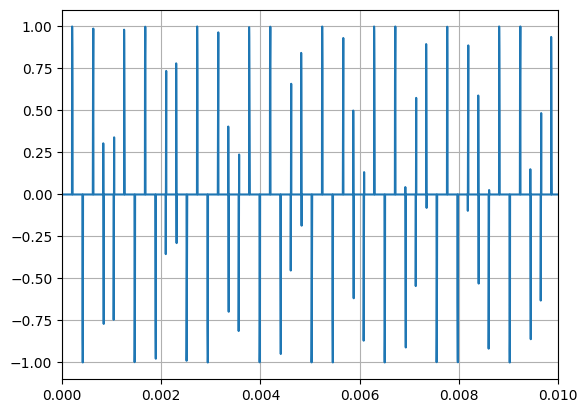

In [4]:
msk_zero = add_zeros(msk_data, 200e-6, 200e-6+10e-6, fs)
plt.plot(t, msk_zero)
plt.xlim(0, 0.01)
plt.grid()


In [5]:
f_msk_data, fft_msk_data = signal.welch(msk_data, fs, nperseg=len(msk_data))
# use only positive frequencies
f_msk_data = f_msk_data[:len(f_msk_data)//2]
fft_msk_data = fft_msk_data[:len(fft_msk_data)//2]

# downconvert
msk_data_down = np.zeros_like(msk_data,dtype=complex)
msk_data_down = msk_data*np.exp(-1j*2*np.pi*carrier*t)
f_msk_data_down, fft_msk_data_down = signal.welch(msk_data_down, fs, nperseg=len(msk_data_down))
# use only positive frequencies
f_msk_data_down = f_msk_data_down[:len(f_msk_data_down)//2]
fft_msk_data_down = fft_msk_data_down[:len(fft_msk_data_down)//2]

# low pass filter
sos = signal.butter(2,0.0001, 'low', output='sos')
w, h = signal.sosfreqz(sos, fs=fs)
msk_data_down_filtered = signal.sosfiltfilt(sos, msk_data_down) 
f_msk_data_down_filtered, fft_msk_data_down_filtered = signal.welch(msk_data_down_filtered, fs, nperseg=len(msk_data_down_filtered))
# use only positive frequencies
f_msk_data_down_filtered = f_msk_data_down_filtered[:len(f_msk_data_down_filtered)//2]
fft_msk_data_down_filtered = fft_msk_data_down_filtered[:len(fft_msk_data_down_filtered)//2]

c:\Users\claes\miniconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(0.0, 10000.0)

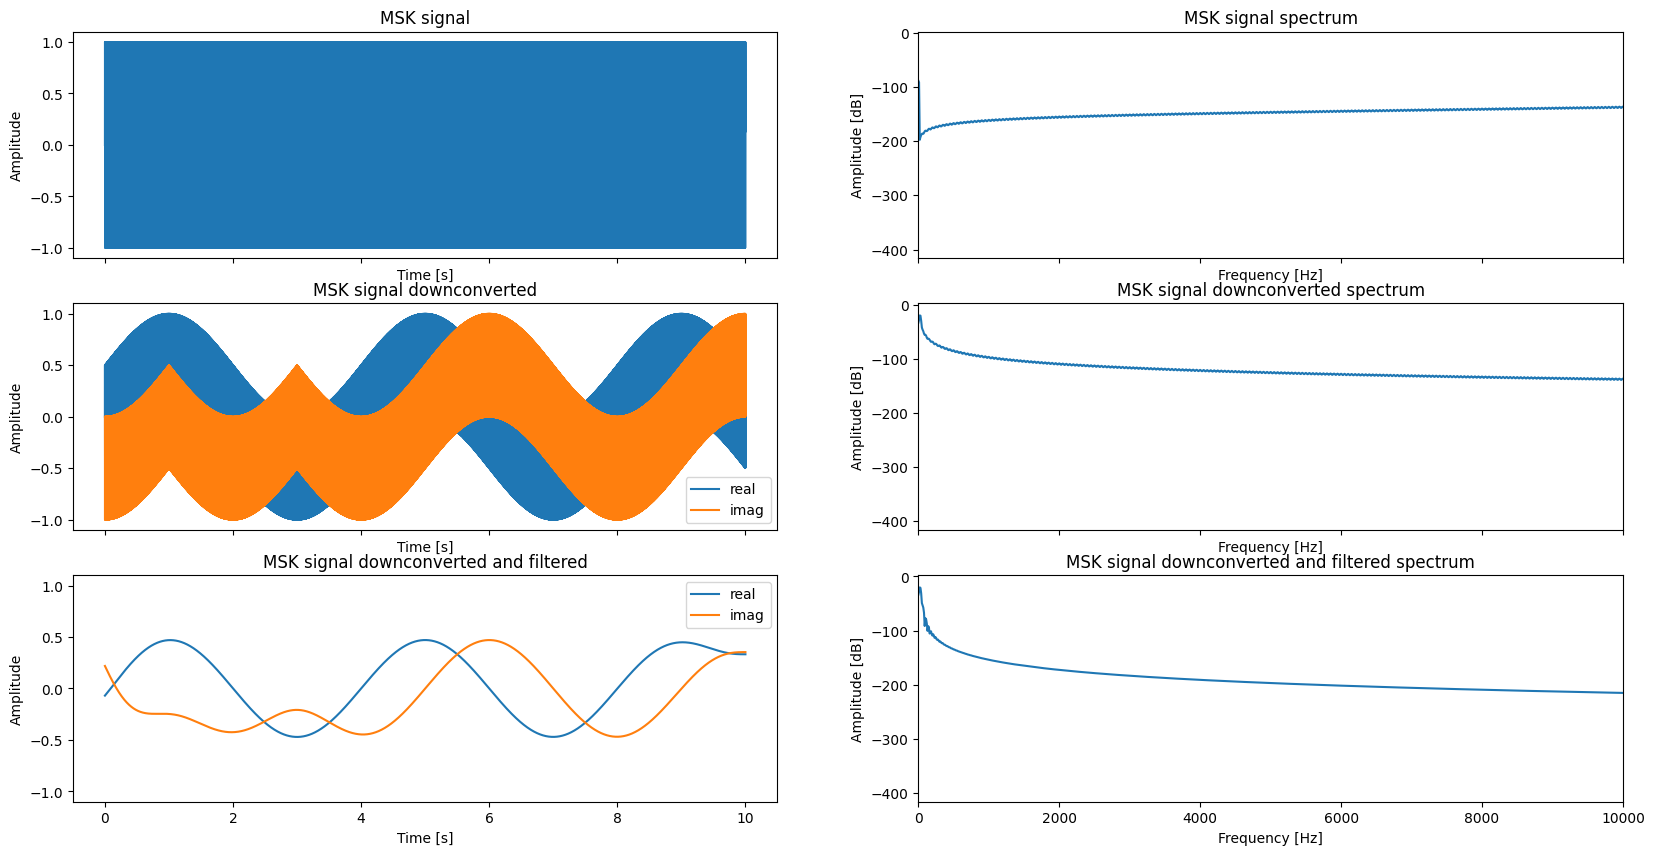

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10), sharex='col', sharey='col')

axs[0, 0].plot(t/T, msk_data)
axs[0, 0].set_title('MSK signal')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(f_msk_data, 10*np.log10(fft_msk_data))
axs[0, 1].set_title('MSK signal spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Amplitude [dB]')
axs[0, 1].set_xlim(0, 1e4)

axs[1, 0].plot(t/T, msk_data_down.real, label='real')
axs[1, 0].plot(t/T, msk_data_down.imag, label='imag')
axs[1, 0].set_title('MSK signal downconverted')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].legend()

axs[1, 1].plot(f_msk_data_down, 10*np.log10(fft_msk_data_down))
axs[1, 1].set_title('MSK signal downconverted spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Amplitude [dB]')
axs[1, 1].set_xlim(0, 1e4)

axs[2, 0].plot(t/T, msk_data_down_filtered.real, label='real')
axs[2, 0].plot(t/T, msk_data_down_filtered.imag, label='imag')
axs[2, 0].set_title('MSK signal downconverted and filtered')
axs[2, 0].set_xlabel('Time [s]')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].legend()

axs[2, 1].plot(f_msk_data_down_filtered, 10*np.log10(fft_msk_data_down_filtered))
axs[2, 1].set_title('MSK signal downconverted and filtered spectrum')
axs[2, 1].set_xlabel('Frequency [Hz]')
axs[2, 1].set_ylabel('Amplitude [dB]')
axs[2, 1].set_xlim(0, 1e4)


# with zeroes added

In [7]:
f_msk_data, fft_msk_data = signal.welch(msk_zero, fs, nperseg=len(msk_data))
# use only positive frequencies
f_msk_data = f_msk_data[:len(f_msk_data)//2]
fft_msk_data = fft_msk_data[:len(fft_msk_data)//2]
# downconvert

msk_data_down = np.zeros_like(msk_zero,dtype=complex)
msk_data_down = msk_zero*np.exp(-1j*2*np.pi*carrier*t)
f_msk_data_down, fft_msk_data_down = signal.welch(msk_data_down, fs, nperseg=len(msk_data_down))
# use only positive frequencies
f_msk_data_down = f_msk_data_down[:len(f_msk_data_down)//2]
fft_msk_data_down = fft_msk_data_down[:len(fft_msk_data_down)//2]

# low pass filter
sos = signal.butter(2,0.0001, 'low', output='sos')
w, h = signal.sosfreqz(sos, fs=fs)
msk_data_down_filtered = signal.sosfiltfilt(sos, msk_data_down) 
f_msk_data_down_filtered, fft_msk_data_down_filtered = signal.welch(msk_data_down_filtered, fs, nperseg=len(msk_data_down_filtered))
# use only positive frequencies
f_msk_data_down_filtered = f_msk_data_down_filtered[:len(f_msk_data_down_filtered)//2]
fft_msk_data_down_filtered = fft_msk_data_down_filtered[:len(fft_msk_data_down_filtered)//2]

(0.0, 10000.0)

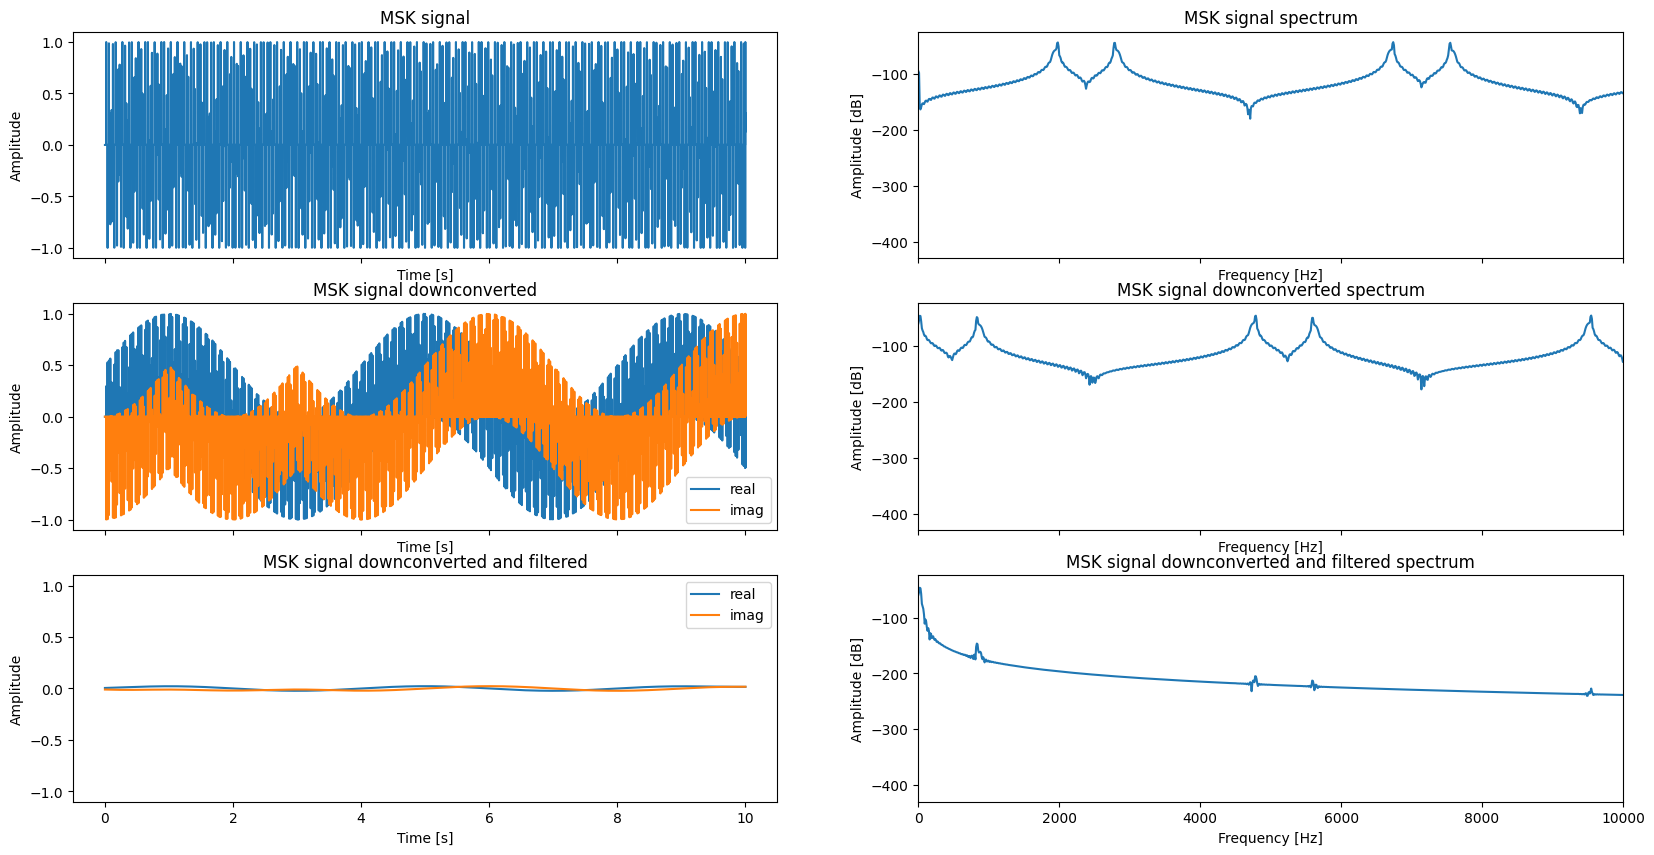

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10), sharex='col', sharey='col')

axs[0, 0].plot(t/T, msk_zero)
axs[0, 0].set_title('MSK signal')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(f_msk_data, 10*np.log10(fft_msk_data))
axs[0, 1].set_title('MSK signal spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Amplitude [dB]')
axs[0, 1].set_xlim(0, 1e4)

axs[1, 0].plot(t/T, msk_data_down.real, label='real')
axs[1, 0].plot(t/T, msk_data_down.imag, label='imag')
axs[1, 0].set_title('MSK signal downconverted')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].legend()

axs[1, 1].plot(f_msk_data_down, 10*np.log10(fft_msk_data_down))
axs[1, 1].set_title('MSK signal downconverted spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Amplitude [dB]')
axs[1, 1].set_xlim(0, 1e4)

axs[2, 0].plot(t/T, msk_data_down_filtered.real, label='real')
axs[2, 0].plot(t/T, msk_data_down_filtered.imag, label='imag')
axs[2, 0].set_title('MSK signal downconverted and filtered')
axs[2, 0].set_xlabel('Time [s]')
axs[2, 0].set_ylabel('Amplitude')
axs[2, 0].legend()

axs[2, 1].plot(f_msk_data_down_filtered, 10*np.log10(fft_msk_data_down_filtered))
axs[2, 1].set_title('MSK signal downconverted and filtered spectrum')
axs[2, 1].set_xlabel('Frequency [Hz]')
axs[2, 1].set_ylabel('Amplitude [dB]')
axs[2, 1].set_xlim(0, 1e4)
